In [1]:
#import 
import numpy as np
from matplotlib import pyplot as plt
from skimage import io
from scipy.optimize import curve_fit
from scipy import optimize
import math

In [2]:
def gaussian(height, center_x, center_y, width_x, width_y):
    """Returns a gaussian function with the given parameters"""
    width_x = float(width_x)
    width_y = float(width_y)
    return lambda x,y: height*np.exp(
                -(((center_x-x)/width_x) **2+((center_y-y)/width_y)**2)/2)

def moments(data):
    """Returns (height, x, y, width_x, width_y)
    the gaussian parameters of a 2D distribution by calculating its
    moments """
    total = data.sum()
    X, Y = np.indices(data.shape)
    x = (X*data).sum()/total
    y = (Y*data).sum()/total
    col = data[:, int(y)]
    width_x = np.sqrt(np.abs((np.arange(col.size)-y)**2*col).sum()/col.sum())
    row = data[int(x), :]
    width_y = np.sqrt(np.abs((np.arange(row.size)-x)**2*row).sum()/row.sum())
    height = data.max()
    return height, x, y, width_x, width_y

def fitgaussian(data):
    """Returns (height, x, y, width_x, width_y)
    the gaussian parameters of a 2D distribution found by a fit"""
    params = moments(data)
    errorfunction = lambda p: np.ravel(gaussian(*p)(*np.indices(data.shape)) -
                                 data)
    p, success = optimize.leastsq(errorfunction, params)
    return p

In [3]:
def search (data) :
    shape = np.shape(data)
    b = np.zeros(shape)
    for i in range (0,shape[0]-1):
        for j in range (0,shape[1]-1) :
            b[i,j] = np.sum (data[i,j]+data[i+1,j]+data[i-1,j]+data[i,j+1]+data[i,j-1])
    result = np.where(b == np.amax(b))
    print(result)
    print(data[result])
    return result 

In [4]:
def searchline (data) :
    shape = np.shape(data)
    b = np.zeros(shape)
    for i in range (0,shape[0]-1):
        for j in range (0,shape[1]-1) :
            b[i,j] = np.sum (data[i,j]+data[i+1,j]+data[i-1,j]+data[i,j+1]+data[i,j-1])
    result = np.where(b == np.amax(b))
    print(result)
    print(data[result])
    return result 

In [106]:
def sinPMTpro(size,number,test,start,end,PMT):
    Power = np.arange (start,end+2, 2)
    powstep = np.size(Power)
    fig, axs = plt.subplots(nrows=1, ncols = powstep, figsize=(9, 6),subplot_kw={'xticks': [], 'yticks': []})
    for ax, i in zip(axs.flat, Power):
        a = np.array(io.imread("20211215AirSample/Inverted/sample8-2/"+str(int(size))+"nm_test/3-"+str(int(number))+"/test"+str(test)+"/"+str(int(i))+"_" + str(PMT) +".tif"))
        ax.imshow(a,cmap="plasma")
    plt.tight_layout()
    plt.show()
    lowest = np.array(io.imread("20211215AirSample/Inverted/sample8-2/"+str(int(size))+"nm_test/3-"+str(int(number))+"/test"+str(test)+"/"+str(int(Power[0]))+"_" + str(PMT) +".tif"))
    center = fitgaussian(lowest)[2]
    center = center +50 #center fix 
    line = np.zeros([lowest.shape[0],powstep])
    for i in range (powstep):
        data = np.array(io.imread("20211215AirSample/Inverted/sample8-2/"+str(int(size))+"nm_test/3-"+str(int(number))+"/test"+str(test)+"/"+str(int(Power[i]))+"_" + str(PMT) +".tif"))
        line[:,i] = data[:,int(center)]
    fig, ax = plt.subplots(figsize=(8,8))
    ax.plot(line)
    plt.xlabel("Pixel")
    plt.ylabel("Intensity(a.u)")

def SPPdata(size,number,test,start,end,PMT):
    Power = np.arange (start,end+2, 2)
    powstep = np.size(Power)
    lowest = np.array(io.imread("20211215AirSample/Inverted/sample8-2/"+str(int(size))+"nm_test/3-"+str(int(number))+"/test"+str(test)+"/"+str(int(Power[0]))+"_" + str(PMT) +".tif"))
    highest = np.array(io.imread("20211215AirSample/Inverted/sample8-2/"+str(int(size))+"nm_test/3-"+str(int(number))+"/test"+str(test)+"/"+str(int(Power[-1]))+"_" + str(PMT) +".tif"))
    center = fitgaussian(lowest)[2]
    center = center +50 #center fix 
    line = np.zeros([lowest.shape[0],powstep])
    for i in range (powstep):
        data = np.array(io.imread("20211215AirSample/Inverted/sample8-2/"+str(int(size))+"nm_test/3-"+str(int(number))+"/test"+str(test)+"/"+str(int(Power[i]))+"_" + str(PMT) +".tif"))
        line[:,i] = data[:,int(center)]
    h_value = fitgaussian(highest)[0]
    l_value = fitgaussian(lowest)[0]
    return line, h_value, l_value

def SPPH(size,number,test,start,end,PMT):
    Power = np.arange (start,end+2, 2)
    powstep = np.size(Power)
    lowest = np.array(io.imread("20211215AirSample/Inverted/sample8-2/"+str(int(size))+"nm_test/3-"+str(int(number))+"/test"+str(test)+"/"+str(int(Power[0]))+"_" + str(PMT) +".tif"))
    highest = np.array(io.imread("20211215AirSample/Inverted/sample8-2/"+str(int(size))+"nm_test/3-"+str(int(number))+"/test"+str(test)+"/"+str(int(Power[-1]))+"_" + str(PMT) +".tif"))
    center = fitgaussian(lowest)[1]
    center = center #center fix 
    line = np.zeros([lowest.shape[1],powstep])
    for i in range (powstep):
        data = np.array(io.imread("20211215AirSample/Inverted/sample8-2/"+str(int(size))+"nm_test/3-"+str(int(number))+"/test"+str(test)+"/"+str(int(Power[i]))+"_" + str(PMT) +".tif"))
        line[:,i] = data[int(center),:]
    h_value = fitgaussian(highest)[0]
    l_value = fitgaussian(lowest)[0]
    return line, h_value, l_value


def onedgaussian(x, a, x0, sigma):
    return a*np.exp(-(x-x0)**2/(2*sigma**2))

In [153]:
def MPP(size,number,test,PMTnum,PMTini,Power_Section) :
    PMTRatio = np.zeros(PMTnum-1)
    PMT = np.linspace(PMTini,PMTini-50*(PMTnum-1),PMTnum)
    for i in range (PMTnum-1):
        PMTRatio[i] = SPPdata(size,number,test,Power_Section[i],Power_Section[i+1],int(PMT[i]))[1]/SPPdata(size,number,test,Power_Section[i+1],Power_Section[i+2],int(PMT[i+1]))[2]
    PMTRatio = np.zeros(PMTnum-1)
    for i in range (PMTnum-1):
        PMTRatio[i] = SPPdata(size,number,test,Power_Section[i],Power_Section[i+1],int(PMT[i]))[1]/SPPdata(size,number,test,Power_Section[i+1],Power_Section[i+2],int(PMT[i+1]))[2]
    #print(PMTRatio)
    alline = np.array(SPPdata(size,number,test,Power_Section[0],Power_Section[1],int(PMT[0]))[0])
    for i in range (PMTnum-1) :
        line = np.array(SPPdata(size,number,test,Power_Section[i+1],Power_Section[i+2],int(PMT[i+1]))[0])
        for j in range (i+1):
            #print("test")
            line = line*PMTRatio[j]
        alline = np.append(alline,line,axis = 1)
        #print(alline)
    return alline

def MPPH(size,number,test,PMTnum,PMTini,Power_Section) :
    PMTRatio = np.zeros(PMTnum-1)
    PMT = np.linspace(PMTini,PMTini-50*(PMTnum-1),PMTnum)
    for i in range (PMTnum-1):
        PMTRatio[i] = SPPH(size,number,test,Power_Section[i],Power_Section[i+1],int(PMT[i]))[1]/SPPH(size,number,test,Power_Section[i+1],Power_Section[i+2],int(PMT[i+1]))[2]
    PMTRatio = np.zeros(PMTnum-1)
    for i in range (PMTnum-1):
        PMTRatio[i] = SPPH(size,number,test,Power_Section[i],Power_Section[i+1],int(PMT[i]))[1]/SPPH(size,number,test,Power_Section[i+1],Power_Section[i+2],int(PMT[i+1]))[2]
    #print(PMTRatio)
    alline = np.array(SPPH(size,number,test,Power_Section[0],Power_Section[1],int(PMT[0]))[0])
    for i in range (PMTnum-1) :
        line = np.array(SPPH(size,number,test,Power_Section[i+1],Power_Section[i+2],int(PMT[i+1]))[0])
        for j in range (i+1):
            #print("test")
            line = line*PMTRatio[j]
        alline = np.append(alline,line,axis = 1)
        #print(alline)
    return alline

        

[ 6  8 10 12 14 16 18 20 22 24 26 28 30]


In [158]:
#def powercal(PowerRange) : 
Powerlist =[7.44,7.72,9.26,12.34,16.99,22.73,29.36,37.2,45.6,55.4,65.1,75.2,85.6]
Angle = np.linspace(6,30,13,dtype=int)
Powerrange = [6,12,16,24]
Angle[Powerrange[1] == Angle]

array([12])

In [155]:
#theoretical PMT fitting 

In [140]:
line = MPP(300,1,5,1,450,[18,22])

Text(0, 0.5, 'Intensity(a.u)')

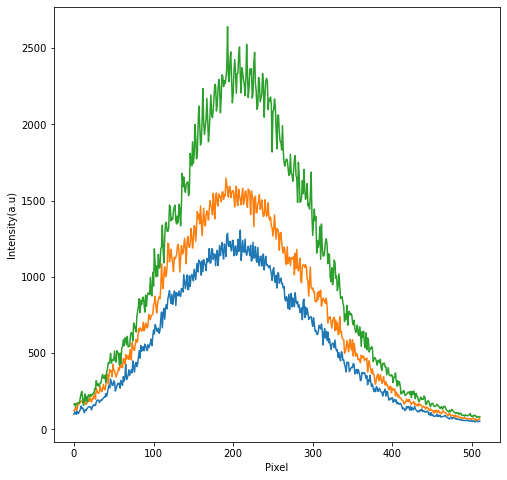

In [141]:
fig, ax = plt.subplots(figsize=(8,8))
ax.plot(line)
plt.xlabel("Pixel")
plt.ylabel("Intensity(a.u)")
#ax.set_xlim(180,200)

Text(0, 0.5, 'Intensity(a.u)')

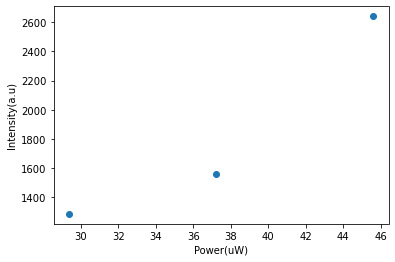

In [143]:
power = [29.36,37.2,45.6]
plt.scatter(power,line[193,:])
plt.xlabel("Power(uW)")
plt.ylabel("Intensity(a.u)")

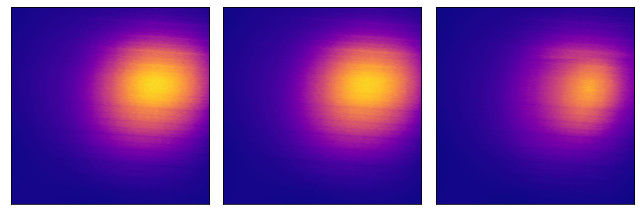

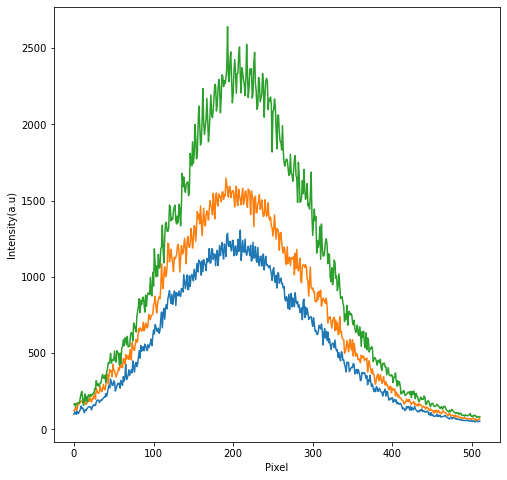

In [144]:
sinPMTpro(300,1,5,18,22,450)

In [145]:
line = MPPH(300,1,5,1,450,[18,22])

Text(0, 0.5, 'Intensity(a.u)')

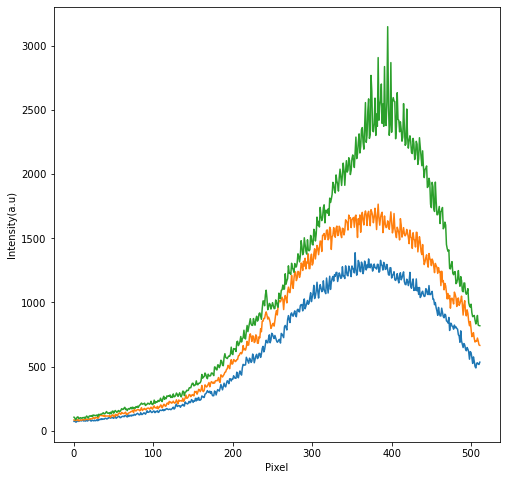

In [146]:
fig, ax = plt.subplots(figsize=(8,8))
ax.plot(line)
plt.xlabel("Pixel")
plt.ylabel("Intensity(a.u)")
#ax.set_xlim(180,200)

Text(0, 0.5, 'Center(xdirection)')

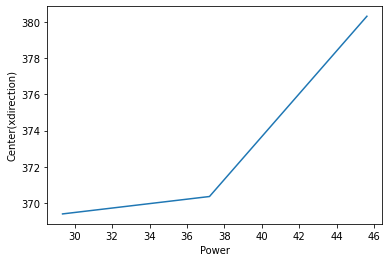

In [147]:
x = np.linspace(0,line.shape[0]-1,line.shape[0])
y = np.zeros(line.shape[1])
for i in range (line.shape[1]):
    popt, pcov = curve_fit(onedgaussian, x, line[:,i])
    y[i] = popt[1]
plt.plot(power,y)
plt.xlabel("Power")
plt.ylabel("Center(xdirection)")

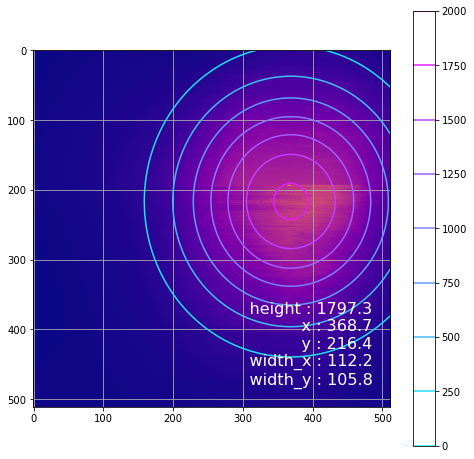

In [149]:
def centercheck(data): 
    fig, ax = plt.subplots(figsize=(8,8))
    ax.imshow(data,cmap=plt.cm.plasma)
    params = fitgaussian(data)
    fit = gaussian(*params)
    plt.contour(fit(*np.indices(data.shape)), cmap=plt.cm.cool)
    ax = plt.gca()
    (height, x, y, width_x, width_y) = params
    plt.text(0.95, 0.05, """
    height : %.1f
    x : %.1f
    y : %.1f
    width_x : %.1f
    width_y : %.1f""" %(height,y, x, width_x, width_y),
            fontsize=16, horizontalalignment='right',
            verticalalignment='bottom', transform=ax.transAxes,color='w')
    plt.colorbar()
    plt.grid()
    plt.show()

data = np.array(io.imread("20211215AirSample/Inverted/sample8-2/300nm_test/3-1/test1/28_400.tif"))
centercheck(data)